# Kaggle 데이터 분석 EDA

# Looker Ecommerce BigQuery Dataset

* The Look은 Looker팀이 개발한 가상의 eCommerce 의류 사이트입니다.
* 데이터 세트에는 고객, 제품, 주문, 물류, 웹 이벤트 및 디지털 마케팅 캠페인에 대한 정보가 포함되어 있습니다.

##  데이터 정보

### 1. distribution_centers.csv

* id: 각 물류센터의 고유 식별코드
* name: 물류센터 명
* latitude: 물류센터 위도좌표
* longitude: 물류센터 경도좌표* longitude: 사용자의 경도 좌표
* traffic_source: 사용자로 연결되는 트래픽의 원본
* created_at: 사용자 계정이 생성된 시간

### 2. events.csv

* id: 각 이벤트의 고유 식별코드
* user_id: 이벤트와 연관된 사용자의 식별코드
* sequence_number: 이벤트의 순서, 시퀀스
* session_id: 이벤트가 발생한 세션의 식별코드
* created_at: 이벤트가 발생한 시간
* ip_address: 이벤트가 발생한 IP 주소
* city: 이벤트가 발생한 도시
* state: 이벤트가 발생한 주
* postal_code: 이벤트 위치의 우편 번호
* browser: 이벤트 중에 사용되는 웹 브라우저
* traffic_source: 이벤트로 이어지는 트래픽의 소스
* uri: 이벤트와 연결된 동일한 리소스 식별코드
* event_type: 기록된 이벤트 유형

### 3. inventory_items.csv

* id: 각 인벤토리 항목에 대한 고유 식별코드
* product_id: 연결된 제품의 식별코드
* created_at: 인벤토리 항목이 생성된 시간
* sold_at: 항목이 판매된 시간
* cost: 재고 항목의 비용
* product_category: 제품의 카테고리
* product_name: 제품의 이름
* product_retail_price: 제품의 소매 가격
* product_department: 제품이 속한 부서
* product_sku: 제품의 재고 유지 단위(SKU)
* product_distribution_center_id: 제품과 연결된 물류 센터의 식별코드


### 4. order_items.csv

* id: 각 주문 항목에 대한 고유 식별코드
* order_id: 주문 번호
* user_id: 주문한 사용자
* product_id: 제품 코드
* inventory_item_id: 인벤토리 항목의 식별코드
* status: 주문 항목의 상태
* created_at: 주문 항목이 작성된 시간
* shipped_at: 주문 품목의 발송 시기.
* delivered_at: 주문 항목이 배달된 시간
* returned_at: 주문 항목이 반환된 시간

### 5. orders.csv

* order_id: 각 주문에 대한 고유 식별코드
* user_id: 주문한 사용자의 식별코드
* status: 주문 상태
* gender: 사용자의 성별
* created_at: 주문이 작성된 시간
* returned_at: 주문이 반환된 시간
* shipped_at: 주문이 발송된 시간
* delivered_at: 주문이 배달된 시간
* num_of_item: 순서에 있는 항목 수

### 6. products.csv

* id: 제품별 고유 식별코드
* cost: 제품 가격
* category: 제품의 카테고리
* name: 제품명
* brand: 제품의 브랜드
* retail_price: 제품의 소매 가격
* department: 제품이 속한 부서
* sku: 제품의 재고 유지 단위(SKU)
* distribution_center_id: 제품과 연결된 물류 센터의 식별코드

### 7. users.csv

* id: 사용자의 식별코드
* first_name: 사용자의 이름
* last_name: 사용자의 성
* email: 사용자 이메일
* age: 사용자의 나이
* gender: 사용자 성별
* state: 사용자가 위치한 주
* street_address: 사용자의 거리 주소
* postal_code: 사용자의 우편번호
* city: 사용자가 위치한 도시
* country: 사용자가 위치한 국가
* latitude: 사용자의 위도 좌표
* longitude: 사용자의 경도 좌표
* traffic_source: 사용자로 연결되는 트래픽의 원본
* created_at: 사용자 계정이 생성된 시간

## 1. 데이터 불러오기 및 데이터 확인

In [1]:
# 필요 라이브러리 호출
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import pycountry
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

In [2]:
# 데이터 불러오기
df_distribute = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Looker_Ecommerce/distribution_centers.csv')
df_events = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Looker_Ecommerce/events.csv')
df_inventory = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Looker_Ecommerce/inventory_items.csv')
df_order_items = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Looker_Ecommerce/order_items.csv')
df_orders = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Looker_Ecommerce/orders.csv')
df_products = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Looker_Ecommerce/products.csv')
df_users = pd.read_csv('C:/Users/chunc/OneDrive/바탕 화면/Python연습/Looker_Ecommerce/users.csv')

* 데이터를 요약하여 확인해본다.

In [3]:
# 1. distribution_centers.csv
df_distribute.head()

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667


In [4]:
# 2. events.csv
df_events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel


In [5]:
# 3. inventory_items.csv
df_inventory.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7


In [6]:
# 4. order_items.csv
df_order_items.head()

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02


In [7]:
# 5. orders.csv
df_orders.head()

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2


In [8]:
# 6. products.csv
df_products.head()

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1


In [9]:
# 7. users.csv
df_users.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.83561,Search,2020-03-13 06:45:00+00:00


* 각 CSV파일의 요소를 파악하고자 한다.
* for문을 사용하여 한번에 출력

In [10]:
total = [
    ('df_distribute', df_distribute),
    ('df_events', df_events),
    ('df_inventory', df_inventory),
    ('df_order_items', df_order_items),
    ('df_orders', df_orders),
    ('df_products', df_products),
    ('df_users', df_users)
]

for name, df in total:
    print(f"\nInfo for {name}:\n{df.info()}\n")

# 연쇄 할당 경고 비활성화
pd.options.mode.chained_assignment = None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes

Info for df_distribute:
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type       object

## 2. 데이터 EDA 및 시각화

### 판매 개요

In [11]:
# 얼마나 많은 브랜드가 작업을 했는가와 재고가 있는 품목의 수
number_of_brand_no = df_products['brand'].nunique()
number_of_products_no = df_products['id'].nunique()

print(f'The Number of Brands: {number_of_brand_no}, \n The Number of Products: {number_of_products_no}')

The Number of Brands: 2756, 
 The Number of Products: 29120


In [12]:
# 현재 판매중인 브랜드 및 품목 수/재고
instock_brand_no = df_inventory['product_brand'].nunique()
instock_products_no = df_inventory['product_id'].nunique()

print(f'The Number of Brands In Stock: {instock_brand_no}, \n The Number of Products In Stock: {instock_products_no}')

The Number of Brands In Stock: 2752, 
 The Number of Products In Stock: 29046


* 이 매장은 2756개 브랜드의 29120개 제품을 보유하고 있다.
* 현재 재고 수를 보면 29046개 제품과 2752개 브랜드로 감소함을 알 수 있다.
* 74개 제품은 재고에서 제외되었고 4개 브랜드는 더 이상 이 소매업체에서 판매하지 않는다.

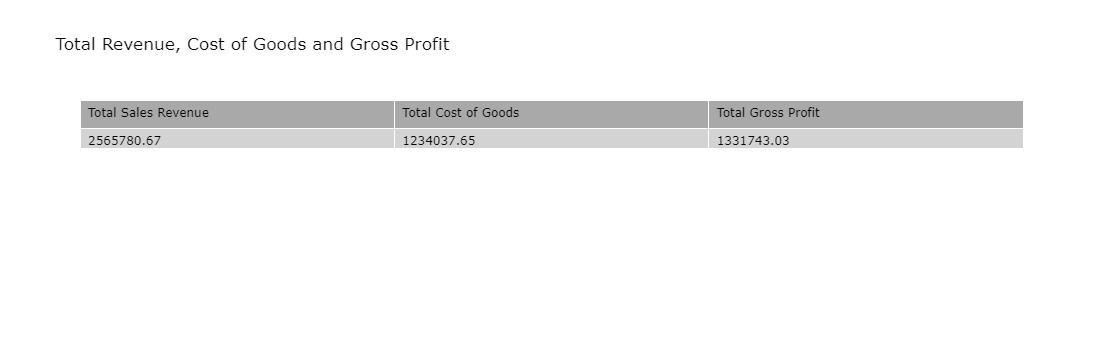

In [32]:
# order 테이블과 products 테이블 병합
merged_order = pd.merge(df_order_items, df_products, left_on = 'product_id', right_on = 'id', how = 'left')
merged_order['profit'] = merged_order['sale_price'] - merged_order['cost']

# date 컬럼 정리, lambda함수 사용
merged_order[['created_at', 'shipped_at', 'delivered_at']] = \
merged_order[['created_at', 'shipped_at', 'delivered_at']].apply(lambda x: pd.to_datetime(x, errors='coerce', format='%Y-%m-%d %H:%M:%S'))


# 주문 완료건만 포함시킨다
merged_orders_complete = merged_order.loc[merged_order['status'] == 'Complete'].copy()

# 환불 기간 이후 주문만 포함시킨다
fourteen_period = merged_orders_complete['delivered_at'].max() - pd.DateOffset(days = 14)
merged_orders_complete = merged_orders_complete[merged_orders_complete['delivered_at'] <= fourteen_period]

# 총수익, 재화비용 및 수익 산정 계산
total_revenue = round(merged_orders_complete['sale_price'].sum(), 2)
total_cost = round(merged_orders_complete['cost'].sum(), 2)
total_profit = round(merged_orders_complete['profit'].sum(), 2)

# 표 생성
fig = go.Figure(data = [go.Table(header = dict(values = ['Total Sales Revenue', 'Total Cost of Goods', 'Total Gross Profit'],
                                               fill_color = 'darkgray', align = 'left'),
                                 cells = dict(values = [total_revenue, total_cost, total_profit], fill_color = 'lightgray', align = 'left'))])
fig.update_layout(font = dict(color = 'black'), title_text = 'Total Revenue, Cost of Goods and Gross Profit')
fig.show()

* 이 전자상거래 스토어는 제품에 123만 개를 투자하여 256만 개의 매출을 올렸고, 궁극적으로 133만 개의 총 이익을 창출했다.
* 마진을 계산하면 전자상거래 스토어는 51.90%의 마진을 기록하여 강력한 재무 성과를 반영하고 운영 및 가격 전략의 효율성을 강조한다.

### 시각화

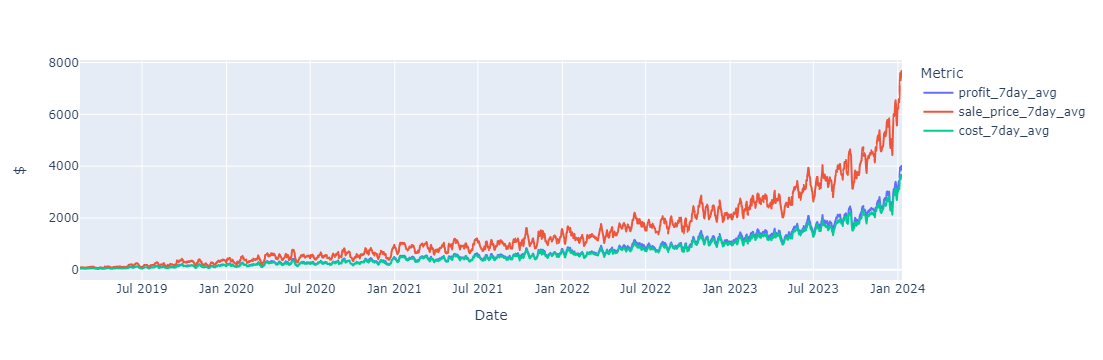

In [33]:
# 년도로 그룹화
grouped_by_year = merged_orders_complete.groupby(merged_orders_complete['delivered_at'].dt.date)[['profit', 'sale_price', 'cost']].sum().reset_index()

# 연도별 7일간 평균지표 그래프 생성
for column in ['profit', 'sale_price', 'cost']:
    grouped_by_year[column + '_7day_avg'] = grouped_by_year[column].rolling(window = 7).mean()
grouped_by_year = grouped_by_year.dropna()

fig = px.line(grouped_by_year, x = 'delivered_at', y = ['profit_7day_avg', 'sale_price_7day_avg', 'cost_7day_avg'],
              hover_data = {'delivered_at': '|%d-%b-%Y'}, labels = dict(value = '$', delivered_at = 'Date', variable = 'Metric'))
fig.show()

* 이익으로 표시되는 수익성은 전자상거래 스토어에서 전반적으로 긍정적인 추세를 보임
* 매출의 변동은 적응형 가격 전략을 제시하며, 최고치는 프로모션 활동이나 수요 증가와 관련이 있을 수 있다.
* 동시에 비용의 변동은 동적인 운영 비용을 강조하여 전략적 비용 관리의 필요성을 보여둔다.
* 전반적으로 전자상거래 비즈니스는 시장 역학에 전략적으로 적응할 수 있는 능력과 함께 회복력을 보여줍니다.

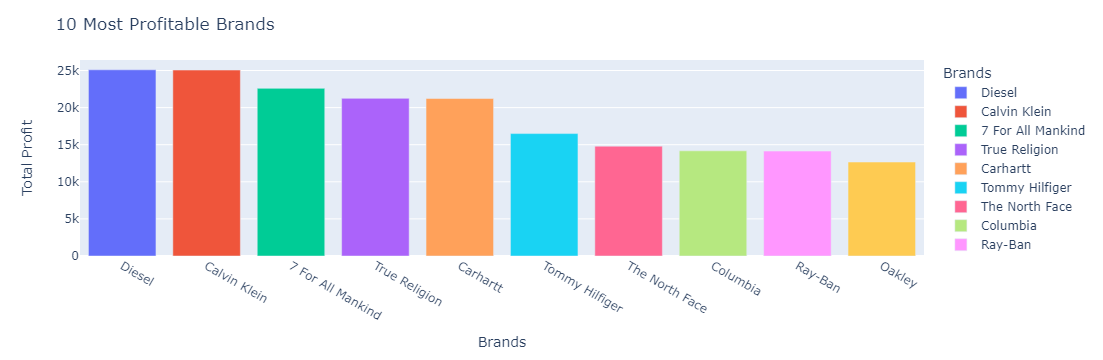

In [35]:
# 수익성 상위 10개 브랜드 발굴
brand_performance = merged_orders_complete.groupby('brand')[['profit', 'sale_price', 'cost']].sum().reset_index()
top_performers = brand_performance.sort_values(by = 'profit', ascending = False).head(10)
fig = px.bar(top_performers, x = 'brand', y = 'profit', color = 'brand', labels = dict(brand = 'Brands', profit = 'Total Profit'))
fig.update_layout(title_text = '10 Most Profitable Brands')
fig.show()

* 막대 차트에서 볼 수 있듯이 '디젤'은 25,093.69달러의 높은 수익을 올리며 전자상거래 스토어의 최고 수익 창출자로 부상하고 있다.
* 다음은 '캘빈 클라인'과 '모든 인류를 위한 7'으로 모두 회사의 재정적 성공에 중추적인 기여자로서의 역할을 확고히 하고 있다.
* '오클리'는 상위 10위 안에 진입했음에도 불구하고 가장 낮은 수익을 나타내어 이익을 개선할 수 있는 잠재적인 수단을 보여주고 있다.

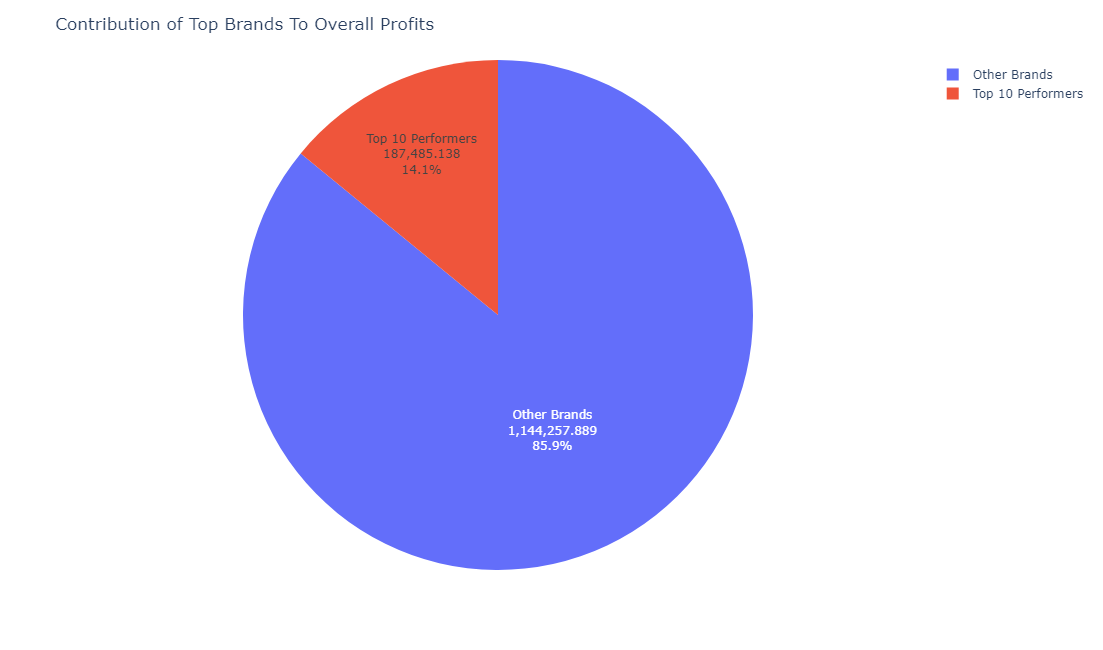

In [37]:
# 전체 이익에서 상위 10개 브랜드의 기여도를 확인
total_top_performers_profit = top_performers['profit'].sum()

# 상위 10개를 제외한 총 회사 수
top_performers_brands = top_performers['brand'].tolist()
other_company_profits = merged_orders_complete.loc[~merged_orders_complete['brand'].isin(top_performers_brands), 'profit'].sum()
combined_top_performers = pd.DataFrame({'brand': ['Top 10 Performers', 'Other Brands'], 'profit': [total_top_performers_profit, other_company_profits]})

fig = px.pie(combined_top_performers, values = 'profit', names = 'brand', height = 650)
fig.update_traces(textposition = 'inside', textinfo = 'label+percent+value')
fig.update_layout(title_text = 'Contribution of Top Brands To Overall Profits')
fig.show()

* 매장에는 2,756개의 다양한 브랜드가 있으며, 주목할 만한 점은 Top 10 성과자가 전체 브랜드 포트폴리오의 0.36%에 불과하다는 것이다.
* 이러한 엘리트 브랜드는 제한된 수에도 불구하고 비즈니스에서 창출되는 총 이익의 14.1%를 차지할 정도로 중추적인 역할을 한다. 이는 Top 10 브랜드가 광범위한 제품 제공 내에서 차지하는 집중적인 영향력과 상당한 재정적 영향력을 강조함

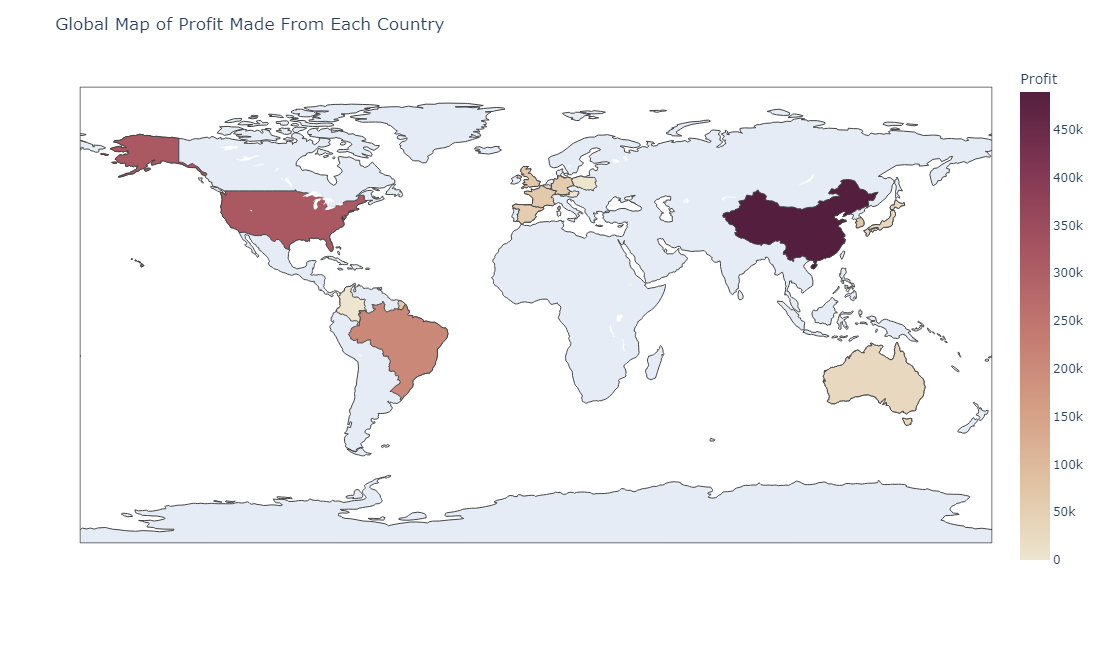

In [41]:
# 판매 위치 확인
merged_all_orders_location = pd.merge(orders_merged[['user_id','order_id','sale_price', 'product_id', 'cost', 'profit', 'status', 'distribution_center_id','created_at', 'shipped_at', 'delivered_at', 'returned_at']],
                        df_users[['id', 'age', 'gender', 'postal_code', 'city', 'country', 'longitude', 'latitude']], left_on = 'user_id', right_on = 'id', how = 'left')
merged_orders_location = merged_all_orders_location.loc[merged_all_orders_location['status'] == 'Complete'].copy()

# 데이터 프레임에서 국가별 ISO3166 코드 가져오기
country_map = {'Brasil': 'BRA', 'South Korea': 'KOR', 'España': 'ESP', 'Deutschland': 'DEU'}

def get_iso_alpha_3(country):
    try:
        return pycountry.countries.get(name = country).alpha_3
    except AttributeError:
        return country_map.get(country)

merged_all_orders_location['iso_code'] = merged_all_orders_location['country'].apply(lambda x: get_iso_alpha_3(x))

# 확인된 주문만 확인
merged_orders_location = merged_all_orders_location.loc[merged_all_orders_location['status'] == 'Complete'].copy()
iso_locations_group = merged_orders_location.groupby(['iso_code', 'country']).agg({'profit': 'sum', 'order_id': 'count'}).reset_index()
iso_locations_group.rename(columns = {'order_id': 'number_of_orders'}, inplace = True)

# 지도 매핑
fig = px.choropleth(iso_locations_group, locations = 'iso_code', color = 'profit', hover_name = 'country', hover_data = ['number_of_orders'],
                    labels = dict(profit = 'Profit'), color_continuous_scale = px.colors.sequential.Brwnyl, height = 650)
fig.update_layout(title_text = 'Global Map of Profit Made From Each Country')
fig.show()

* 이 전자상거래 매장은 전 세계적으로 제품을 판매하고 있으며, 대부분의 고객은 주요 3개국에서 온다.
* 중국은 무려 15,653건의 주문과 489,449.13천 건의 상당한 이익을 내며 가장 큰 소비자로 눈에 띄는 것을 확인할 수 있다.
* 미국은 10,276건의 주문과 313,423.43천 건의 이익을 내며 또 다른 중요한 시장이다.
* 브라질은 규모는 작지만 여전히 6,719건의 주문으로 인상적이며 205851.013건의 이익을 창출한다. 이 매장은 독일, 프랑스, 영국과 같은 유럽 국가에서도 좋은 성과를 내며 이 지역에서 강력한 입지를 보여주고 있다.

### 물류 개요

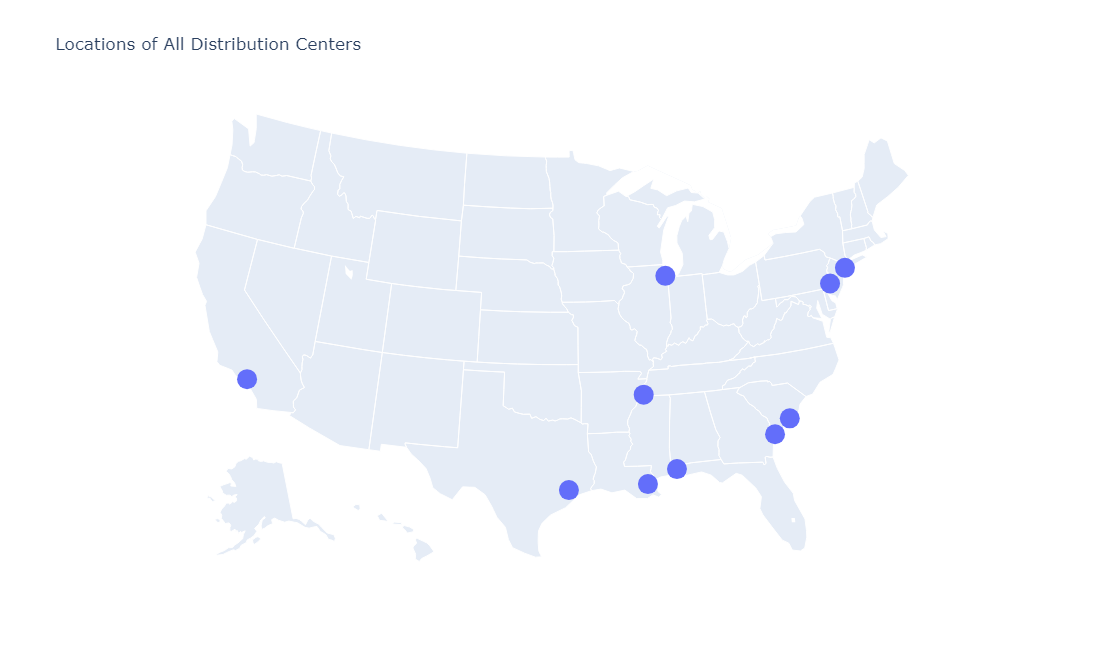

In [43]:
# 물류센터의 위치 그래프
df_distribute

fig = go.Figure(data = go.Scattergeo(
    lon = df_distribute['longitude'],
    lat = df_distribute['latitude'],
    text = df_distribute['name'],
    mode = 'markers', marker = dict(size = 20), ))

fig.update_layout(title_text = 'Locations of All Distribution Centers', geo_scope = 'usa', height = 650,)
fig.show()

* 이 전자상거래 매장은 전략적으로 미국 내에 위치한 10개의 물류센터 네트워크를 전략적으로 관리하고 있다.
* 특히 서부 지역은 캘리포니아 로스앤젤레스에 단일 물류센터를 운영하고 있고, 남서부 지역은 텍사스 휴스턴에 하나의 물류센터를 운영중이다.
* 중서부 지역은 일리노이주 시카고에 하나의 물류센터를 운영하고 있다.
* 유통망은 동부 지역에 더 집중되어 있는데, 중부 대서양에 두 개의 센터가 있고 남동부 지역에 네 개의 센터가 있다.
* 흥미롭게도 현재 북동부와 북서부 지역에는 전용 물류센터가 없어 향후 확장이나 최적화 가능성이 있는 지역이 부각되고 있다고 보여진다.